Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns                       #visualisation
import matplotlib.pyplot as plt 

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Reading Data

In [3]:
df = pd.read_csv('data.csv')

To display the first 5 rows

In [4]:
df.head(5)

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


To display the bottom 5 rows

In [5]:
df.tail(5)

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
11909,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,46120
11910,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,56670
11911,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,50620
11912,Acura,ZDX,2013,premium unleaded (recommended),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,50920
11913,Lincoln,Zephyr,2006,regular unleaded,221.0,6.0,AUTOMATIC,front wheel drive,4.0,Luxury,Midsize,Sedan,26,17,61,28995


Details of Dataframe

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11914 entries, 0 to 11913
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Make               11914 non-null  object 
 1   Model              11914 non-null  object 
 2   Year               11914 non-null  int64  
 3   Engine Fuel Type   11911 non-null  object 
 4   Engine HP          11845 non-null  float64
 5   Engine Cylinders   11884 non-null  float64
 6   Transmission Type  11914 non-null  object 
 7   Driven_Wheels      11914 non-null  object 
 8   Number of Doors    11908 non-null  float64
 9   Market Category    8172 non-null   object 
 10  Vehicle Size       11914 non-null  object 
 11  Vehicle Style      11914 non-null  object 
 12  highway MPG        11914 non-null  int64  
 13  city mpg           11914 non-null  int64  
 14  Popularity         11914 non-null  int64  
 15  MSRP               11914 non-null  int64  
dtypes: float64(3), int64(5

Statistical summary

In [7]:
df.describe()

,Year,Engine HP,Engine Cylinders,Number of Doors,highway MPG,city mpg,Popularity,MSRP
count,11914.000000,11845.00000,11884.000000,11908.000000,11914.000000,11914.000000,11914.000000,1.191400e+04
mean,2010.384338,249.38607,5.628829,3.436093,26.637485,19.733255,1554.911197,4.059474e+04
std,7.579740,109.19187,1.780559,0.881315,8.863001,8.987798,1441.855347,6.010910e+04
min,1990.000000,55.00000,0.000000,2.000000,12.000000,7.000000,2.000000,2.000000e+03
25%,2007.000000,170.00000,4.000000,2.000000,22.000000,16.000000,549.000000,2.100000e+04
50%,2015.000000,227.00000,6.000000,4.000000,26.000000,18.000000,1385.000000,2.999500e+04
75%,2016.000000,300.00000,6.000000,4.000000,30.000000,22.000000,2009.000000,4.223125e+04
max,2017.000000,1001.00000,16.000000,4.000000,354.000000,137.000000,5657.000000,2.065902e+06


Dropping the columns and displaying first 5 rows

In [8]:
df = df.rename(columns={"Engine HP": "HP", "Engine Cylinders": "Cylinders", "Transmission Type": "Transmission", "Driven_Wheels": "Drive Mode","highway MPG": "MPG-H", "city mpg": "MPG-C", "MSRP": "Price" })
df.head(5)

,Make,Model,Year,Engine Fuel Type,HP,Cylinders,Transmission,Drive Mode,Number of Doors,Market Category,Vehicle Size,Vehicle Style,MPG-H,MPG-C,Popularity,Price
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


Getting the number of rows & columns from dataframe

In [9]:
df.shape


(11914, 16)

Checking for duplicates

In [10]:
duplicate_rows_df = df[df.duplicated()]
print("number of duplicate rows: ", duplicate_rows_df.shape)

number of duplicate rows:  (715, 16)


Deleting duplicates

In [11]:
df = df.drop_duplicates()

Checking for null values

In [12]:
print(df.isnull().sum())

Make                   0
Model                  0
Year                   0
Engine Fuel Type       3
HP                    69
Cylinders             30
Transmission           0
Drive Mode             0
Number of Doors        6
Market Category     3376
Vehicle Size           0
Vehicle Style          0
MPG-H                  0
MPG-C                  0
Popularity             0
Price                  0
dtype: int64


Drop null values and count number of rows

In [13]:
df = df.dropna()
df.count()

Make                7735
Model               7735
Year                7735
Engine Fuel Type    7735
HP                  7735
Cylinders           7735
Transmission        7735
Drive Mode          7735
Number of Doors     7735
Market Category     7735
Vehicle Size        7735
Vehicle Style       7735
MPG-H               7735
MPG-C               7735
Popularity          7735
Price               7735
dtype: int64

In [14]:
print(df.isnull().sum())

Make                0
Model               0
Year                0
Engine Fuel Type    0
HP                  0
Cylinders           0
Transmission        0
Drive Mode          0
Number of Doors     0
Market Category     0
Vehicle Size        0
Vehicle Style       0
MPG-H               0
MPG-C               0
Popularity          0
Price               0
dtype: int64


Detecting outliers

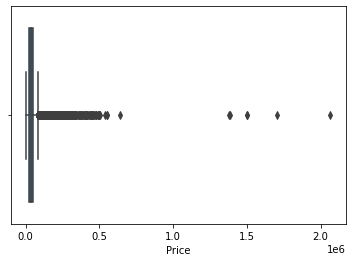

In [15]:
sns.boxplot(x=df['Price'])     #Boxplot of price

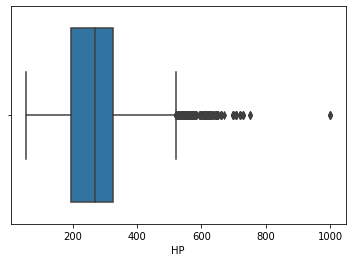

In [16]:
sns.boxplot(x=df['HP'])    #Boxplot of HP

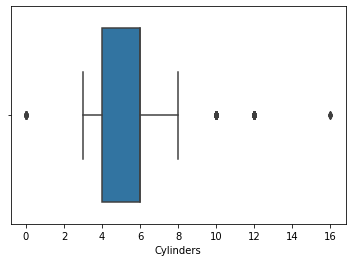

In [17]:
sns.boxplot(x=df['Cylinders'])       #Boxplot of Cyclinders

Removing Outliners

In [18]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

Year                   6.0
HP                   131.0
Cylinders              2.0
Number of Doors        2.0
MPG-H                  8.0
MPG-C                  6.0
Popularity          1489.0
Price              23252.5
dtype: float64


In [19]:
df = df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]
df.shape

(5622, 16)

Checking if outliers are removed or not

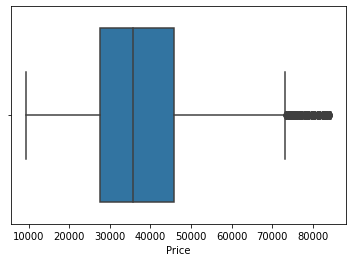

In [21]:
sns.boxplot(x=df['Price'])


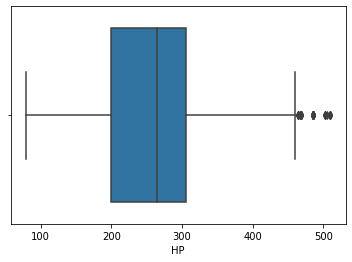

In [22]:
sns.boxplot(x=df['HP'])


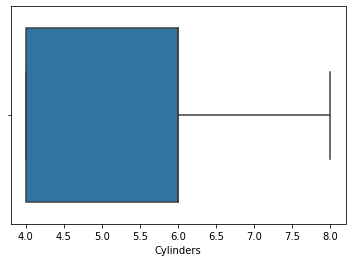

In [23]:
sns.boxplot(x=df['Cylinders'])

Top 10 most represented car brands

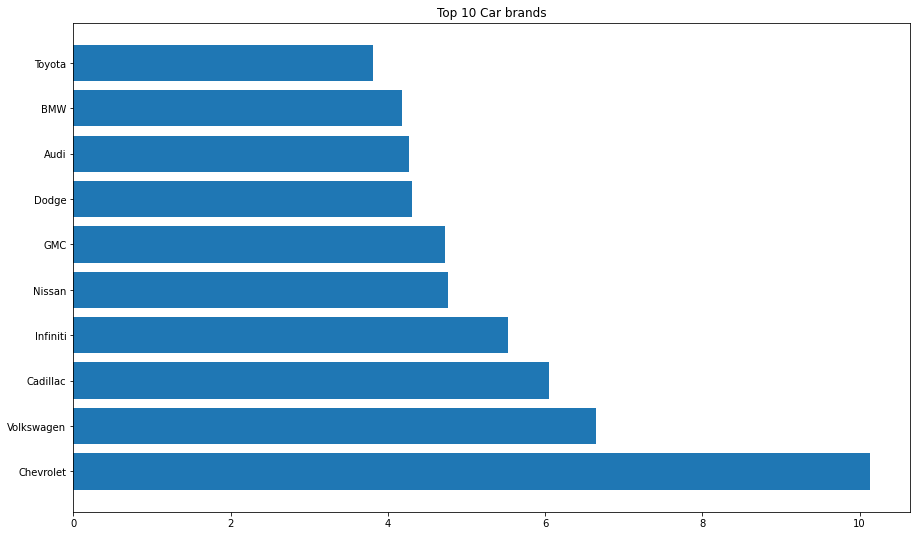

In [24]:
# Percentage of car per brand
counts = df['Make'].value_counts()*100/sum(df['Make'].value_counts())

# Top 10 car brands
popular_labels = counts.index[:10]
    
# Plot
plt.figure(figsize=(15,9))
plt.barh(popular_labels, width=counts[:10])
plt.title('Top 10 Car brands')
plt.show()

Average price of top car brands

In [25]:
prices = df[['Make','Price']].loc[(df['Make'] == 'Chevrolet')|
               (df['Make'] == 'Ford')|
               (df['Make'] == 'Volkswagen')|
               (df['Make'] == 'Toyota')|
               (df['Make'] == 'Dodge')|
               (df['Make'] == 'Nissan')|
               (df['Make'] == 'GMC')|
               (df['Make'] == 'Honda')|
               (df['Make'] == 'Mazda')].groupby('Make').mean()
print(prices)

                   Price
Make                    
Chevrolet   34804.256140
Dodge       30237.995868
GMC         37863.725564
Honda       29311.985294
Mazda       25898.916256
Nissan      33645.876866
Toyota      32619.345794
Volkswagen  30344.291444


Finding correlation

In [26]:
df.corr()

,Year,HP,Cylinders,Number of Doors,MPG-H,MPG-C,Popularity,Price
Year,1.000000,0.151051,-0.173957,0.121819,0.344971,0.320515,0.194030,0.224195
HP,0.151051,1.000000,0.772090,-0.038800,-0.558102,-0.646821,0.089515,0.757838
Cylinders,-0.173957,0.772090,1.000000,-0.002469,-0.709868,-0.749259,0.021924,0.518301
Number of Doors,0.121819,-0.038800,-0.002469,1.000000,-0.045712,0.003745,-0.098174,0.015691
MPG-H,0.344971,-0.558102,-0.709868,-0.045712,1.000000,0.924245,0.109159,-0.308098
MPG-C,0.320515,-0.646821,-0.749259,0.003745,0.924245,1.000000,0.062135,-0.381777
Popularity,0.194030,0.089515,0.021924,-0.098174,0.109159,0.062135,1.000000,0.141315
Price,0.224195,0.757838,0.518301,0.015691,-0.308098,-0.381777,0.141315,1.000000


HeatMap

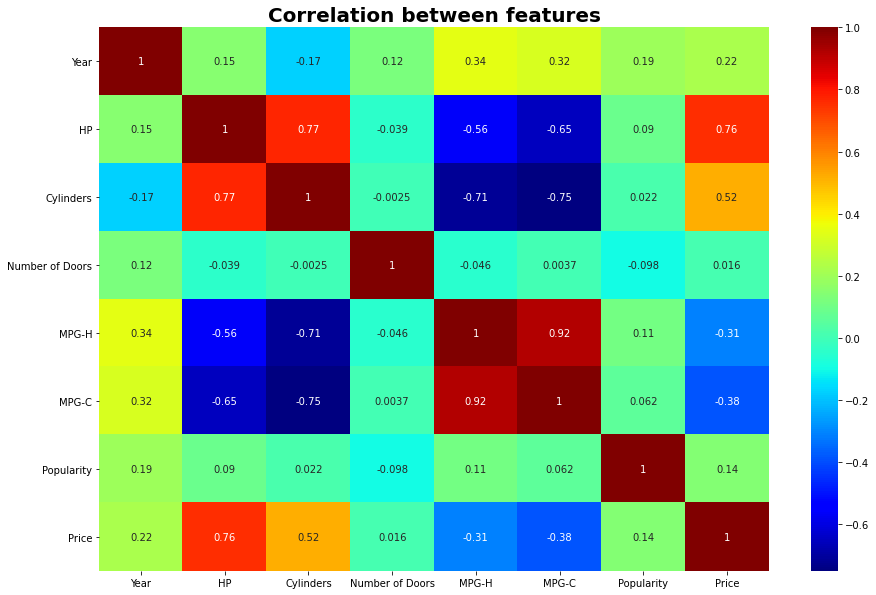

In [27]:
car_corr=df.corr()
f,ax=plt.subplots(figsize=(15,10))
sns.heatmap(car_corr, cmap='jet',annot=True)
plt.title("Correlation between features", 
          weight='bold', 
          fontsize=20)
plt.show()

There is a +ve correlation between:

Engine HP and Engine Cylinders
Engine HP and MSRP
Engine Cylinders and MSRP
MPG-H and MPG-C
There is Strong -ve correlation between :

MPG-H and Cylinders
MPG-C and Cylinders

Plotting graphs

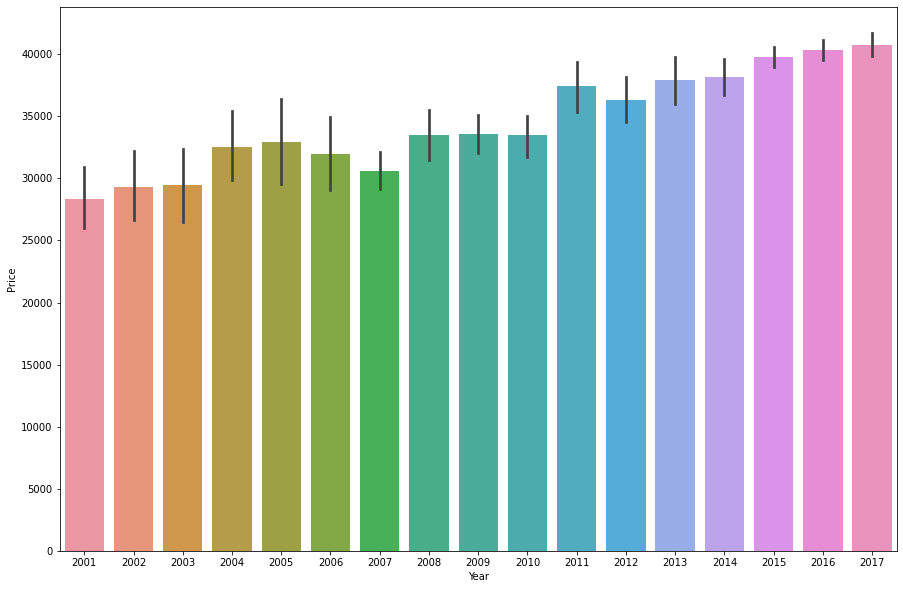

In [28]:
# Graph between year and price
plt.figure(figsize=(15,10))
sns.barplot(df['Year'],df['Price'])

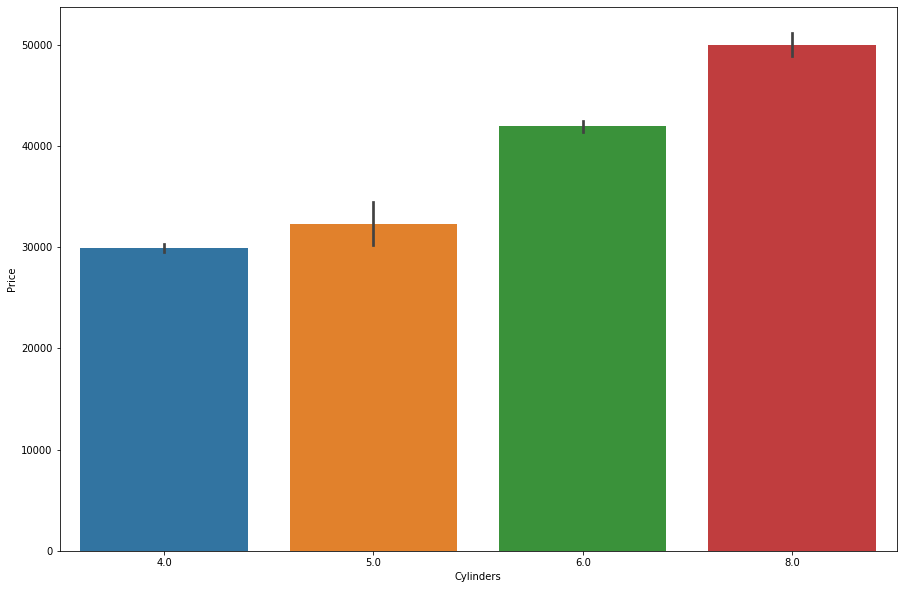

In [29]:
# Graph between cyclinders and price
plt.figure(figsize=(15,10))
sns.barplot(df['Cylinders'],df['Price'])

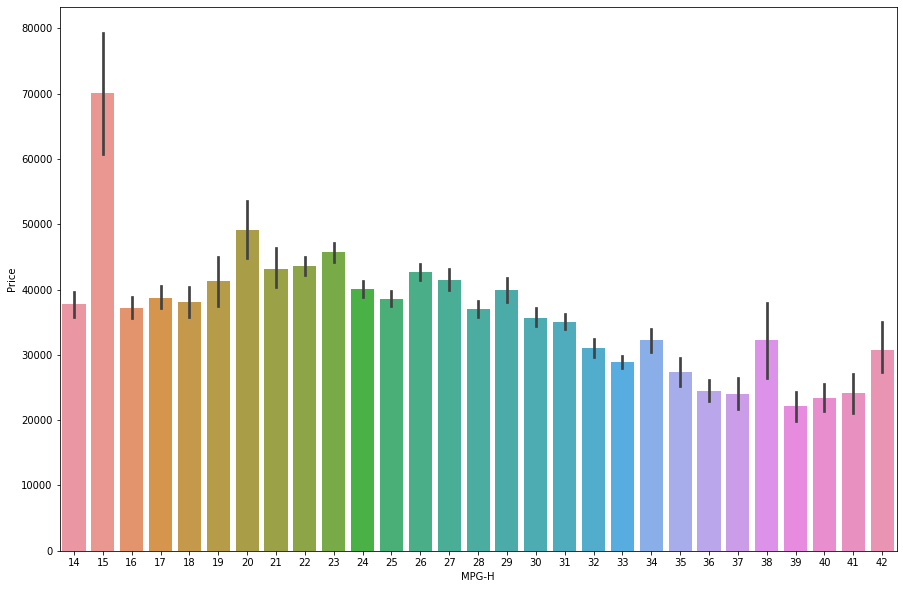

In [30]:
# Graph between MGP-H and price
plt.figure(figsize=(15,10))
sns.barplot(df['MPG-H'],df['Price'])

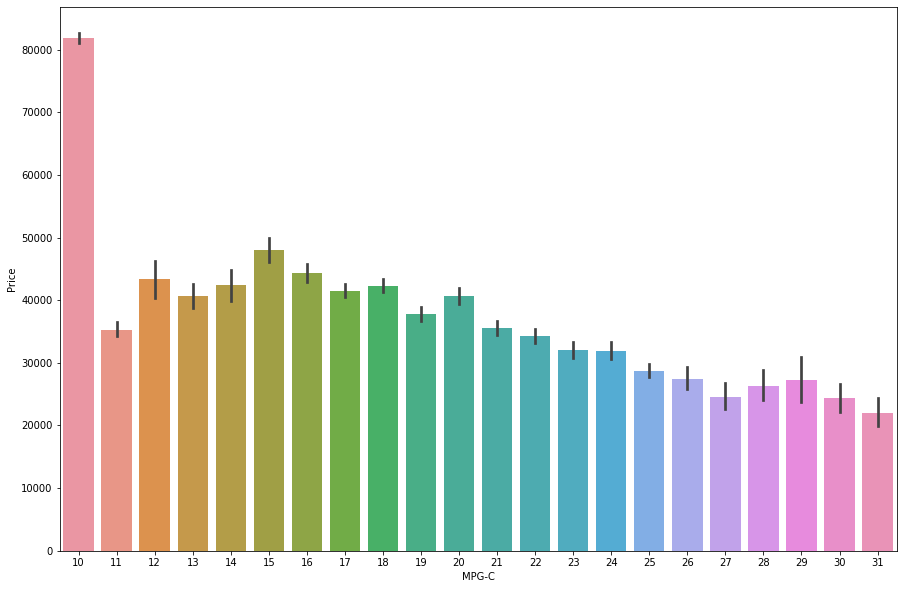

In [31]:
# Graph between MGP-C and price
plt.figure(figsize=(15,10))
sns.barplot(df['MPG-C'],df['Price'])

Finding from the graph
Car price increased after year 2000
More the number the cylinders, more is the price
For MPG-H 15, price is maximum and for MPG-H 39, price is lowest.
For MPG-C 10, price is maximum and for MPG-C 31, price is minimum


Encoding data

In [32]:

dcode=df

dcode["Make"]=dcode["Make"].astype("category")
dcode["Make"]=dcode["Make"].cat.codes

dcode["Model"] = dcode["Model"].astype('category')
dcode["Model"] = dcode["Model"].cat.codes

'''dcode["Year"]=dcode["Year"].astype("category")
dcode["Year"]=dcode["Year"].cat.codes
dcode["HP"]=dcode["HP"].astype("category")
dcode["HP"]=dcode["HP"].cat.codes
dcode["Cylinders"]=dcode["Cylinders"].astype("category")
dcode["Cylinders"]=dcode["Cylinders"].cat.codes
dcode["MPG-H"]=dcode["MPG-H"].astype("category")
dcode["MPG-H"]=dcode["MPG-H"].cat.codes
dcode["MPG-C"]=dcode["MPG-C"].astype("category")
dcode["MPG-C"]=dcode["MPG-C"].cat.codes
dcode["Popularity"]=dcode["Popularity"].astype("category")
dcode["Popularity"]=dcode["Popularity"].cat.codes'''

dcode["Transmission"]=dcode["Transmission"].astype("category")
dcode["Transmission"]=dcode["Transmission"].cat.codes

dcode["Drive Mode"]=dcode["Drive Mode"].astype("category")
dcode["Drive Mode"]=dcode["Drive Mode"].cat.codes

dcode["Vehicle Size"]=dcode["Vehicle Size"].astype("category")
dcode["Vehicle Size"]=dcode["Vehicle Size"].cat.codes

dcode["Vehicle Style"]=dcode["Vehicle Style"].astype("category")
dcode["Vehicle Style"]=dcode["Vehicle Style"].cat.codes

Pre-processing data

In [34]:
from sklearn import preprocessing
X = np.asarray(dcode[['Make', 'Model', 'Transmission', 'Drive Mode','Vehicle Size','Vehicle Style']])
y = np.asarray(dcode['Price'])
X = preprocessing.StandardScaler().fit(X).transform(X)

Splitting data

In [35]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=44)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(4497, 6) (4497,)
(1125, 6) (1125,)


Linear Regression

In [36]:
from sklearn import linear_model
lm = linear_model.LinearRegression()
model = lm.fit(X_train,y_train)
predictions = lm.predict(X_test)

In [37]:
#Score Prediction
from sklearn.linear_model import LinearRegression
model = LinearRegression().fit(X_train,y_train)
y_pred = model.predict(X_test)
model.score(X_test,y_pred)

1.0

Decision Tree

In [38]:


from sklearn.tree import DecisionTreeClassifier 
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report 
d_m = DecisionTreeClassifier(random_state = 0)
d_m.fit(X_train,y_train)
y_pred = d_m.predict(X_test)
print("Confusion Matrix:\n\n", confusion_matrix(y_test, y_pred)) 
print ("\nAccuracy : ", accuracy_score(y_test,y_pred)*100)

Confusion Matrix:

 [[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 1 0]
 [0 0 0 ... 0 0 3]]

Accuracy :  2.488888888888889




MSE, RMSE, MAE, R-sq

In [39]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import math

print('MSE: %.2f' % mean_squared_error(y_test, y_pred))
print('Coefficient of determination or R Squared : %.2f' % r2_score(y_test, y_pred))
print('MAE :%.2f' % mean_absolute_error(y_test, y_pred))
print('RMSE : %.2f' % math.sqrt(mean_squared_error(y_test, y_pred)))

MSE: 48448161.22
Coefficient of determination or R Squared : 0.76
MAE :4423.16
RMSE : 6960.47


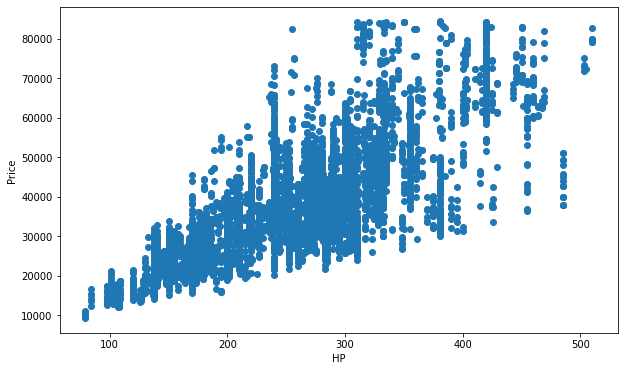

In [40]:
fig, ax = plt.subplots(figsize=(10,6))
ax.scatter(df['HP'], df['Price'])
ax.set_xlabel('HP')
ax.set_ylabel('Price')
plt.show()